In [1]:
#!unzip '/content/Plant finder.v2i.yolov8.zip'

In [2]:
!pip install ultralytics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.3/491.3 KB 28.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 22.9 MB/s eta 0:00:00


In [3]:
!pip install roboflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.7/55.7 KB 6.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 KB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 KB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 KB 6.5 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9676 sha256=4e508b1419749f9f9874929edd44a2fcd362de92dc1c29c180911084e11ab6b2
  Stored in directory: /root/.cache/pip/wheels/04/5f/3e/46cc37c5d698415694d83f607f833f83f0149e49b3af9d0f38
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.0.9
    Uninstalling pyparsing-3.0.9:
      Successfully uninstalled pyparsing-3.0.9
  Attempting uninstall: idna
    Found existing installation: idna 3.4
    Uninstalling idna-3.4:
    

In [4]:
from roboflow import Roboflow
rf = Roboflow(api_key="C9yZ97uSdNRP1Vb4QCXV")
project = rf.workspace("ece542nnproject").project("plant-finder")
dataset = project.version(2).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics<=8.0.20 is required but found version=8.0.64, to fix: `pip install ultralytics<=8.0.20`


Extracting Dataset Version Zip to Plant-finder-2 in yolov8:: 100%|██████████| 4846/4846 [00:01<00:00, 3259.23it/s]


In [5]:
from ultralytics import YOLO
model = YOLO("yolov8n.pt")  # load a pretrained model (recommended for training)

100%|██████████| 6.23M/6.23M [00:00<00:00, 153MB/s]


In [ ]:
model.train(data="/content/Plant-finder-2/data.yaml", epochs=200)  # train the model

Ultralytics YOLOv8.0.61 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/Plant-finder-2/data.yaml, epochs=200, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dyna

  0%|          | 0.00/755k [00:00<?, ?B/s]

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.Conv                  [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.Conv                  [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.C2f                   [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.Conv                  [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.C2f                   [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.Conv                  [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.C2f                   [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

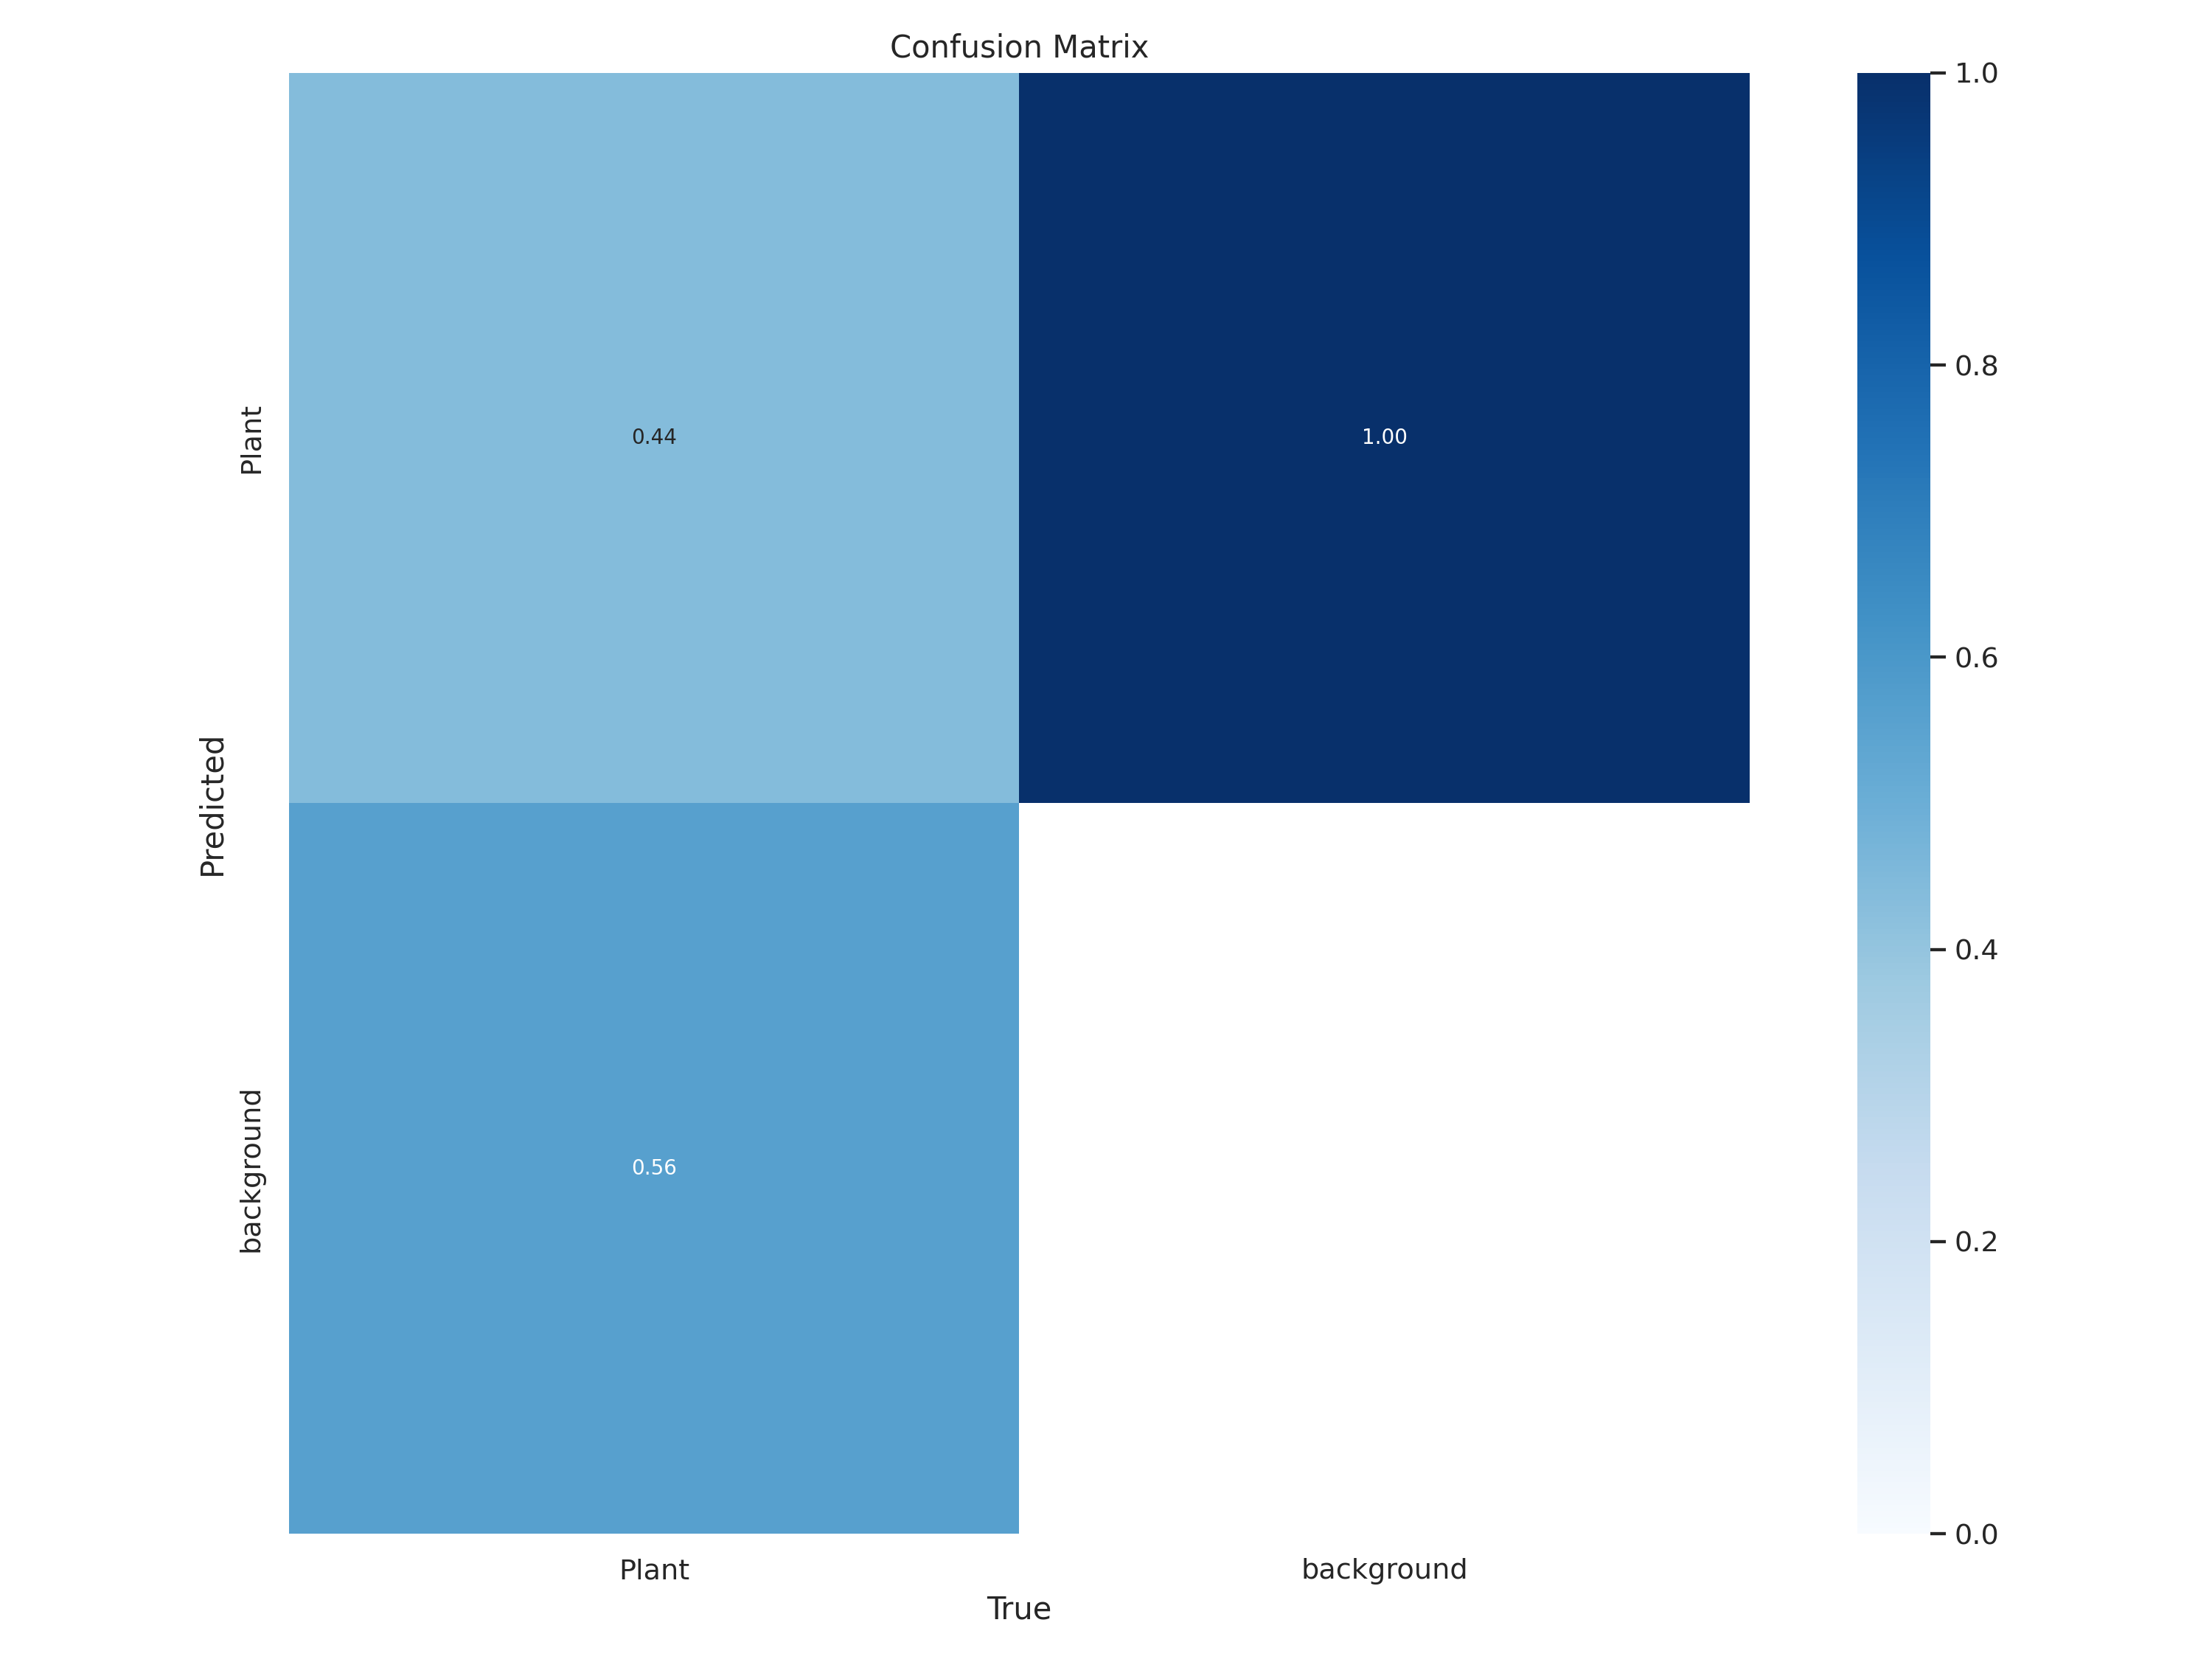

In [ ]:
from IPython.display import display, Image
Image(filename='/content/runs/detect/train/confusion_matrix.png',width=600)

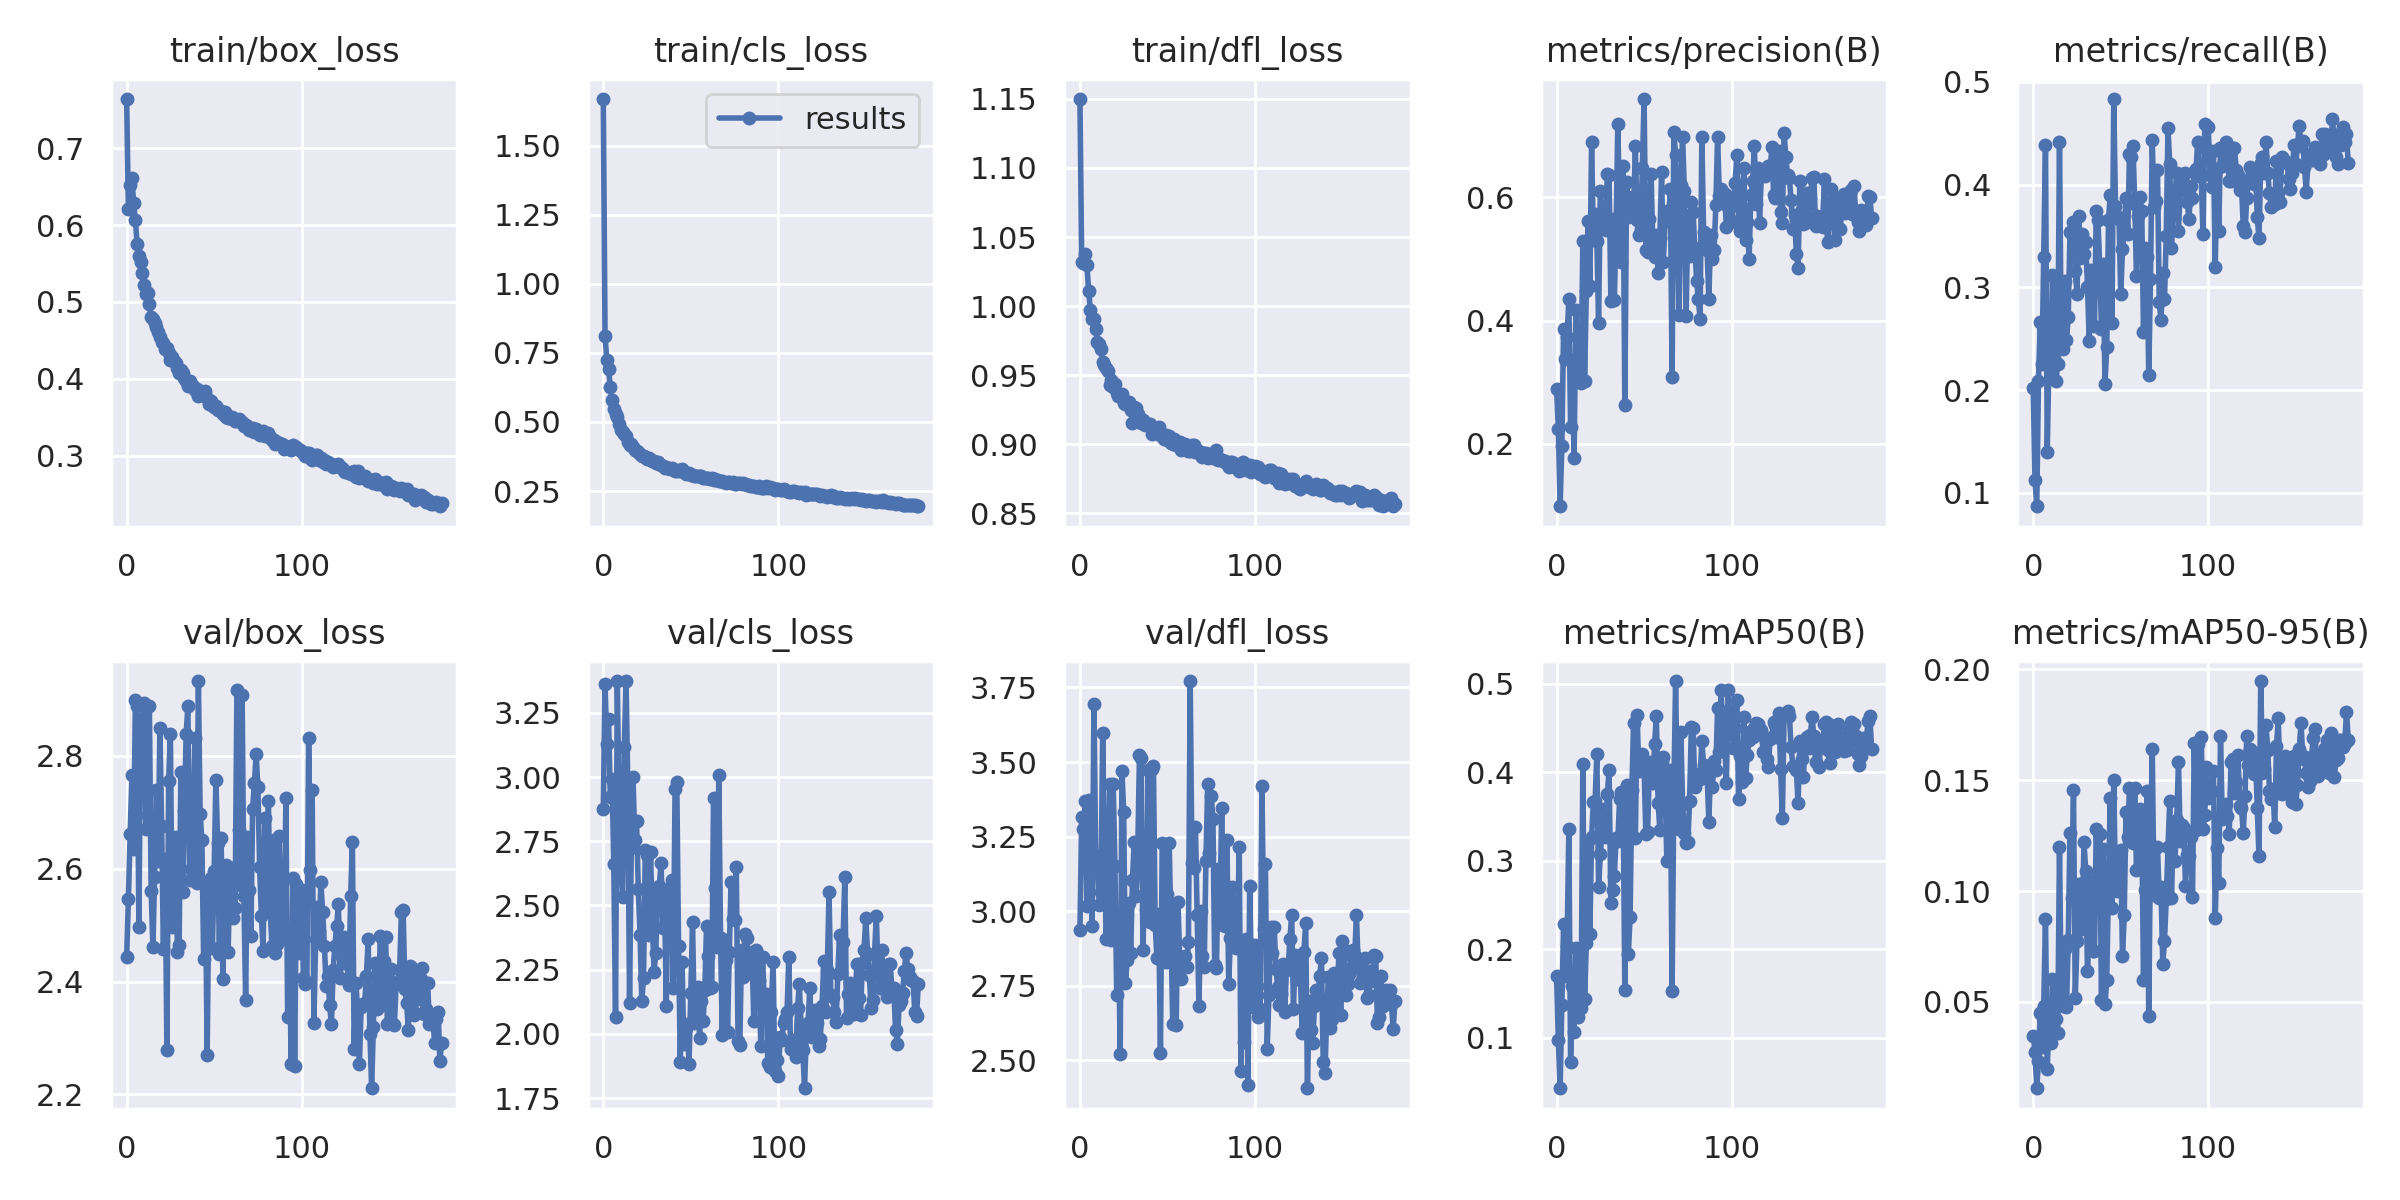

In [ ]:
Image(filename='/content/runs/detect/train/results.png',width=600)

In [ ]:
metrics = model.val()
metrics

Ultralytics YOLOv8.0.61 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/Plant-finder-2/valid/labels.cache... 208 images, 0 backgrounds, 0 corrupt: 100%|██████████| 208/208 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:07<00:00,  1.81it/s]
                   all        208        679      0.704      0.421      0.466      0.195
Speed: 3.0ms preprocess, 5.5ms inference, 0.0ms loss, 2.6ms postprocess per image
Results saved to runs/detect/val


ultralytics.yolo.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.yolo.utils.metrics.Metric object
confusion_matrix: <ultralytics.yolo.utils.metrics.ConfusionMatrix object at 0x7f354887ceb0>
fitness: 0.22178061981386163
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
maps: array([    0.19468])
names: {0: 'Plant'}
plot: True
results_dict: {'metrics/precision(B)': 0.7037546206173012, 'metrics/recall(B)': 0.4212076583210604, 'metrics/mAP50(B)': 0.4657240014421784, 'metrics/mAP50-95(B)': 0.19467579963293755, 'fitness': 0.22178061981386163}
save_dir: PosixPath('runs/detect/val')
speed: {'preprocess': 3.0153256196242113, 'inference': 5.511779051560621, 'loss': 0.0009467968573937049, 'postprocess': 2.638919995381282}

In [ ]:
Image(filename='/content/runs/detect/val/confusion_matrix.png',width=600)

In [ ]:
Image(filename='/content/runs/detect/val/val_batch0_pred.jpg',width=600)

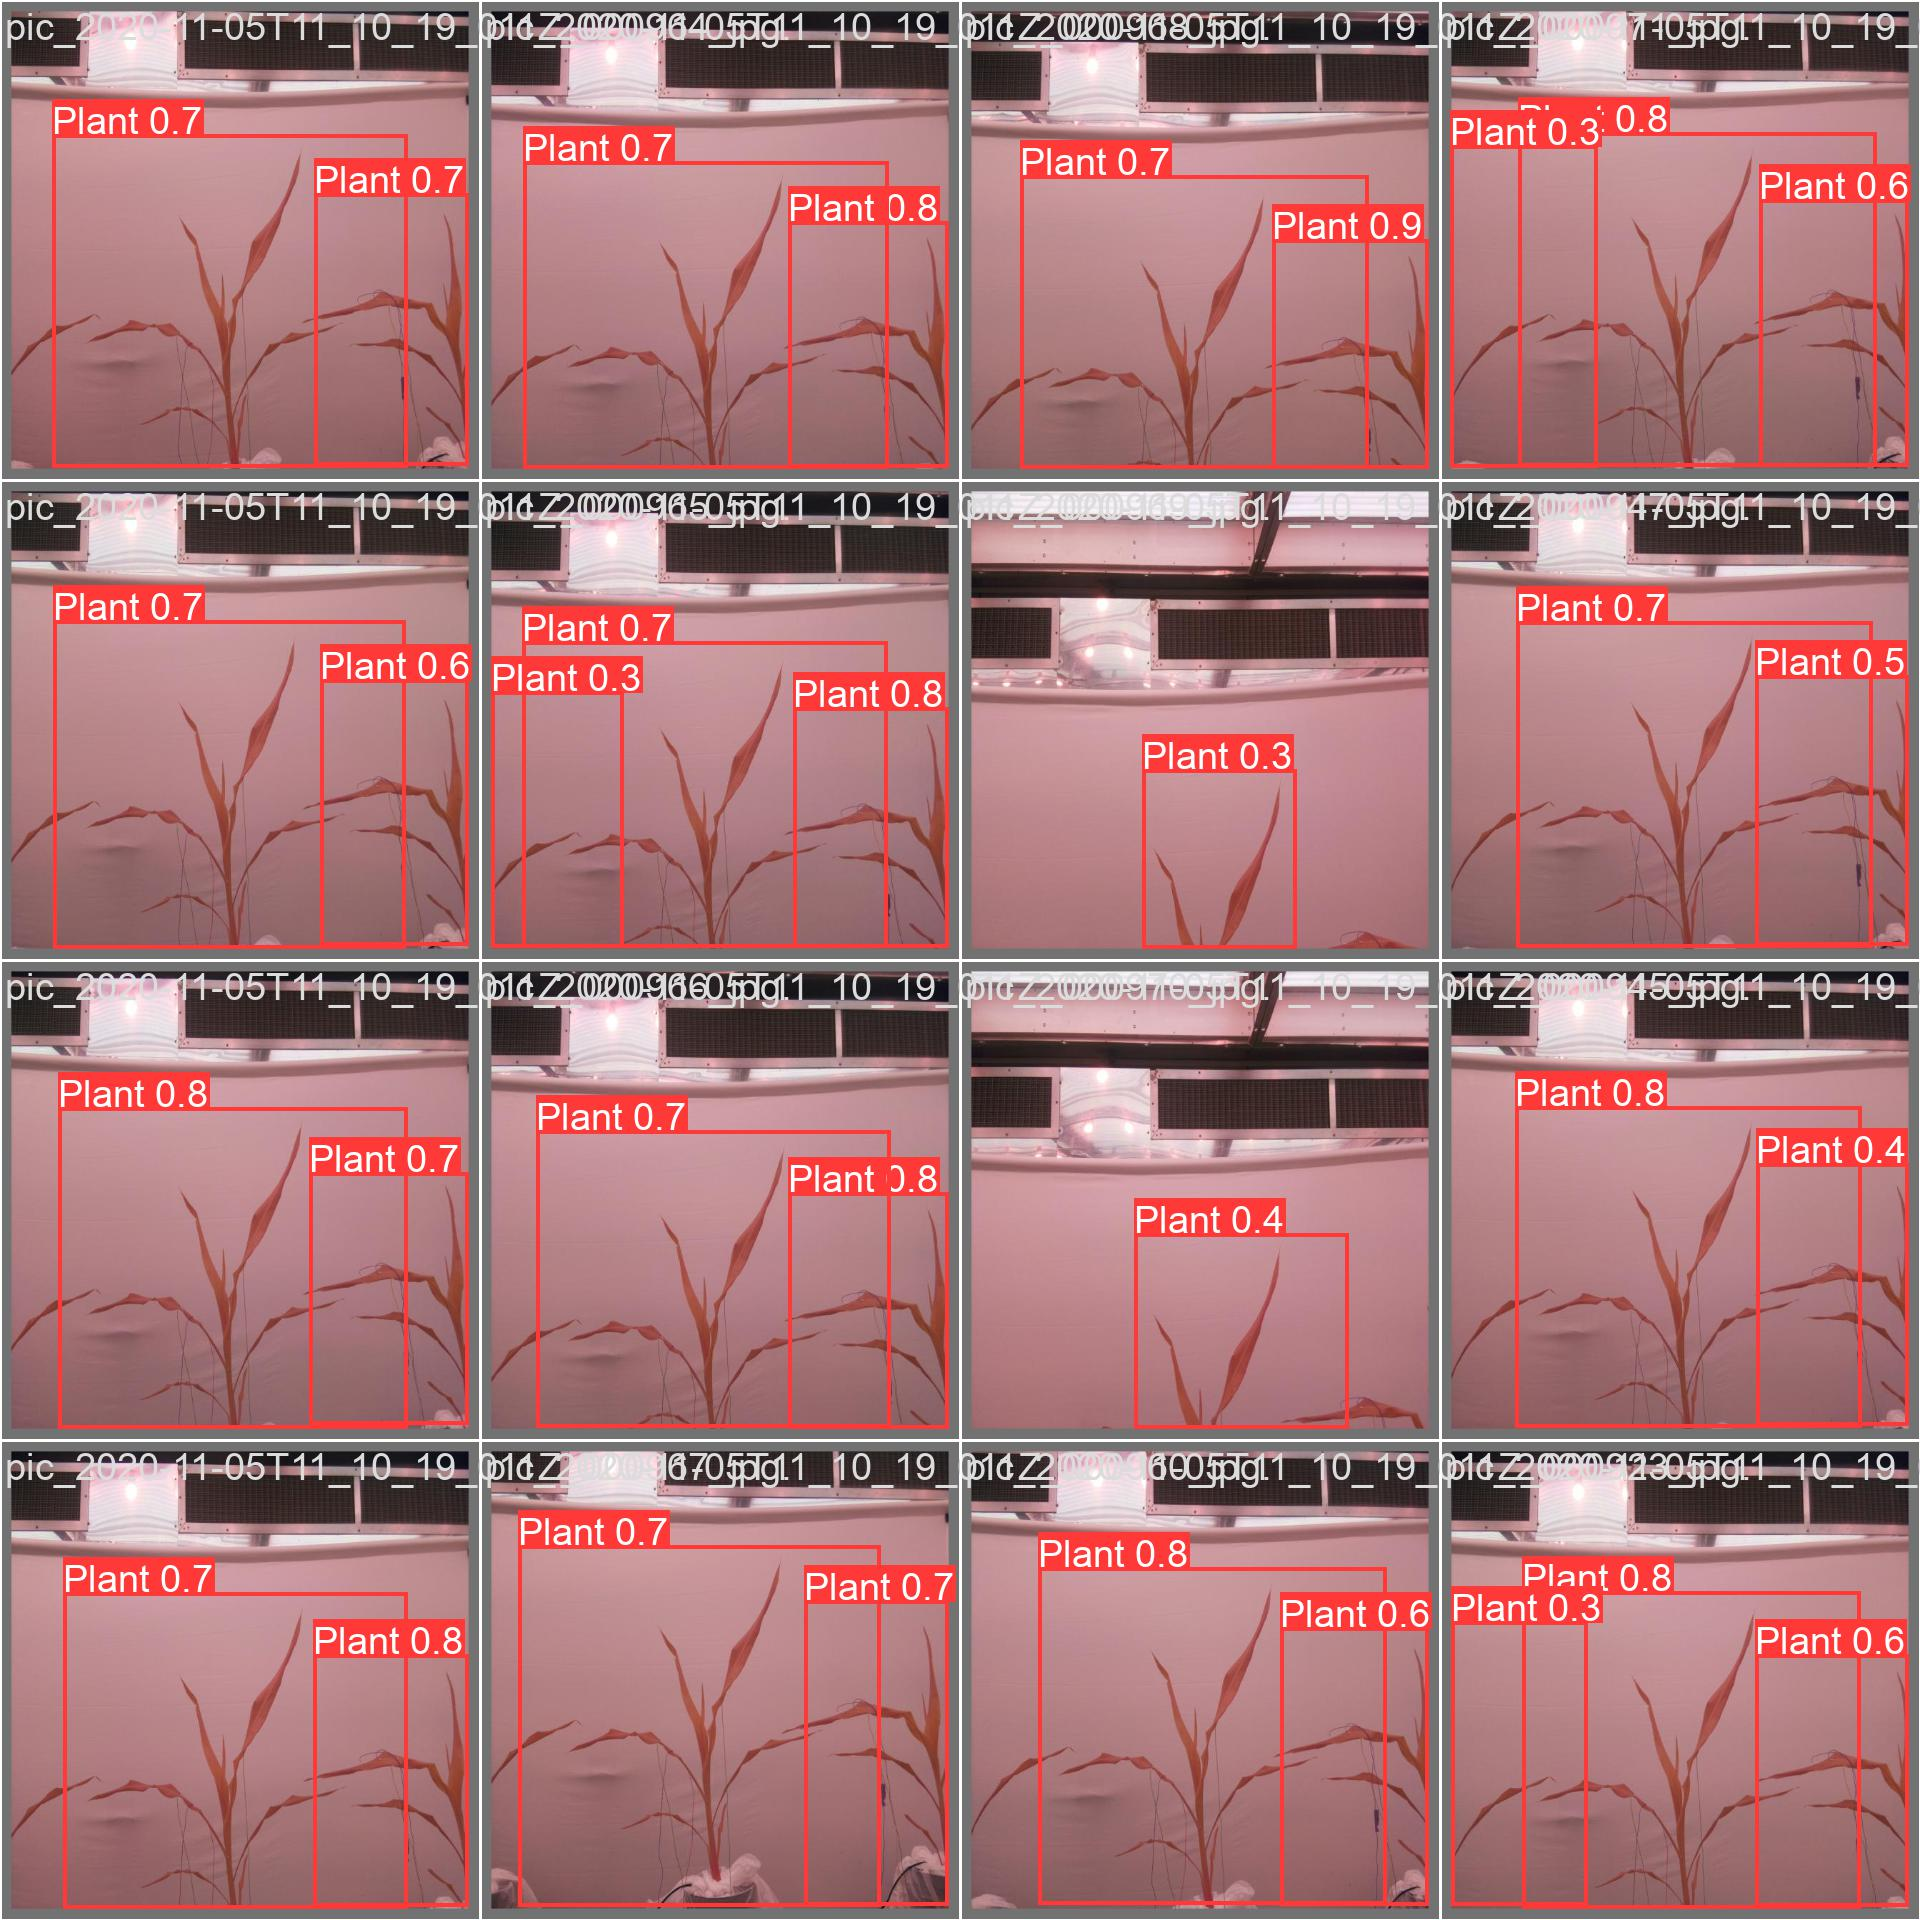

In [ ]:
Image(filename='/content/runs/detect/val/val_batch1_pred.jpg',width=600)

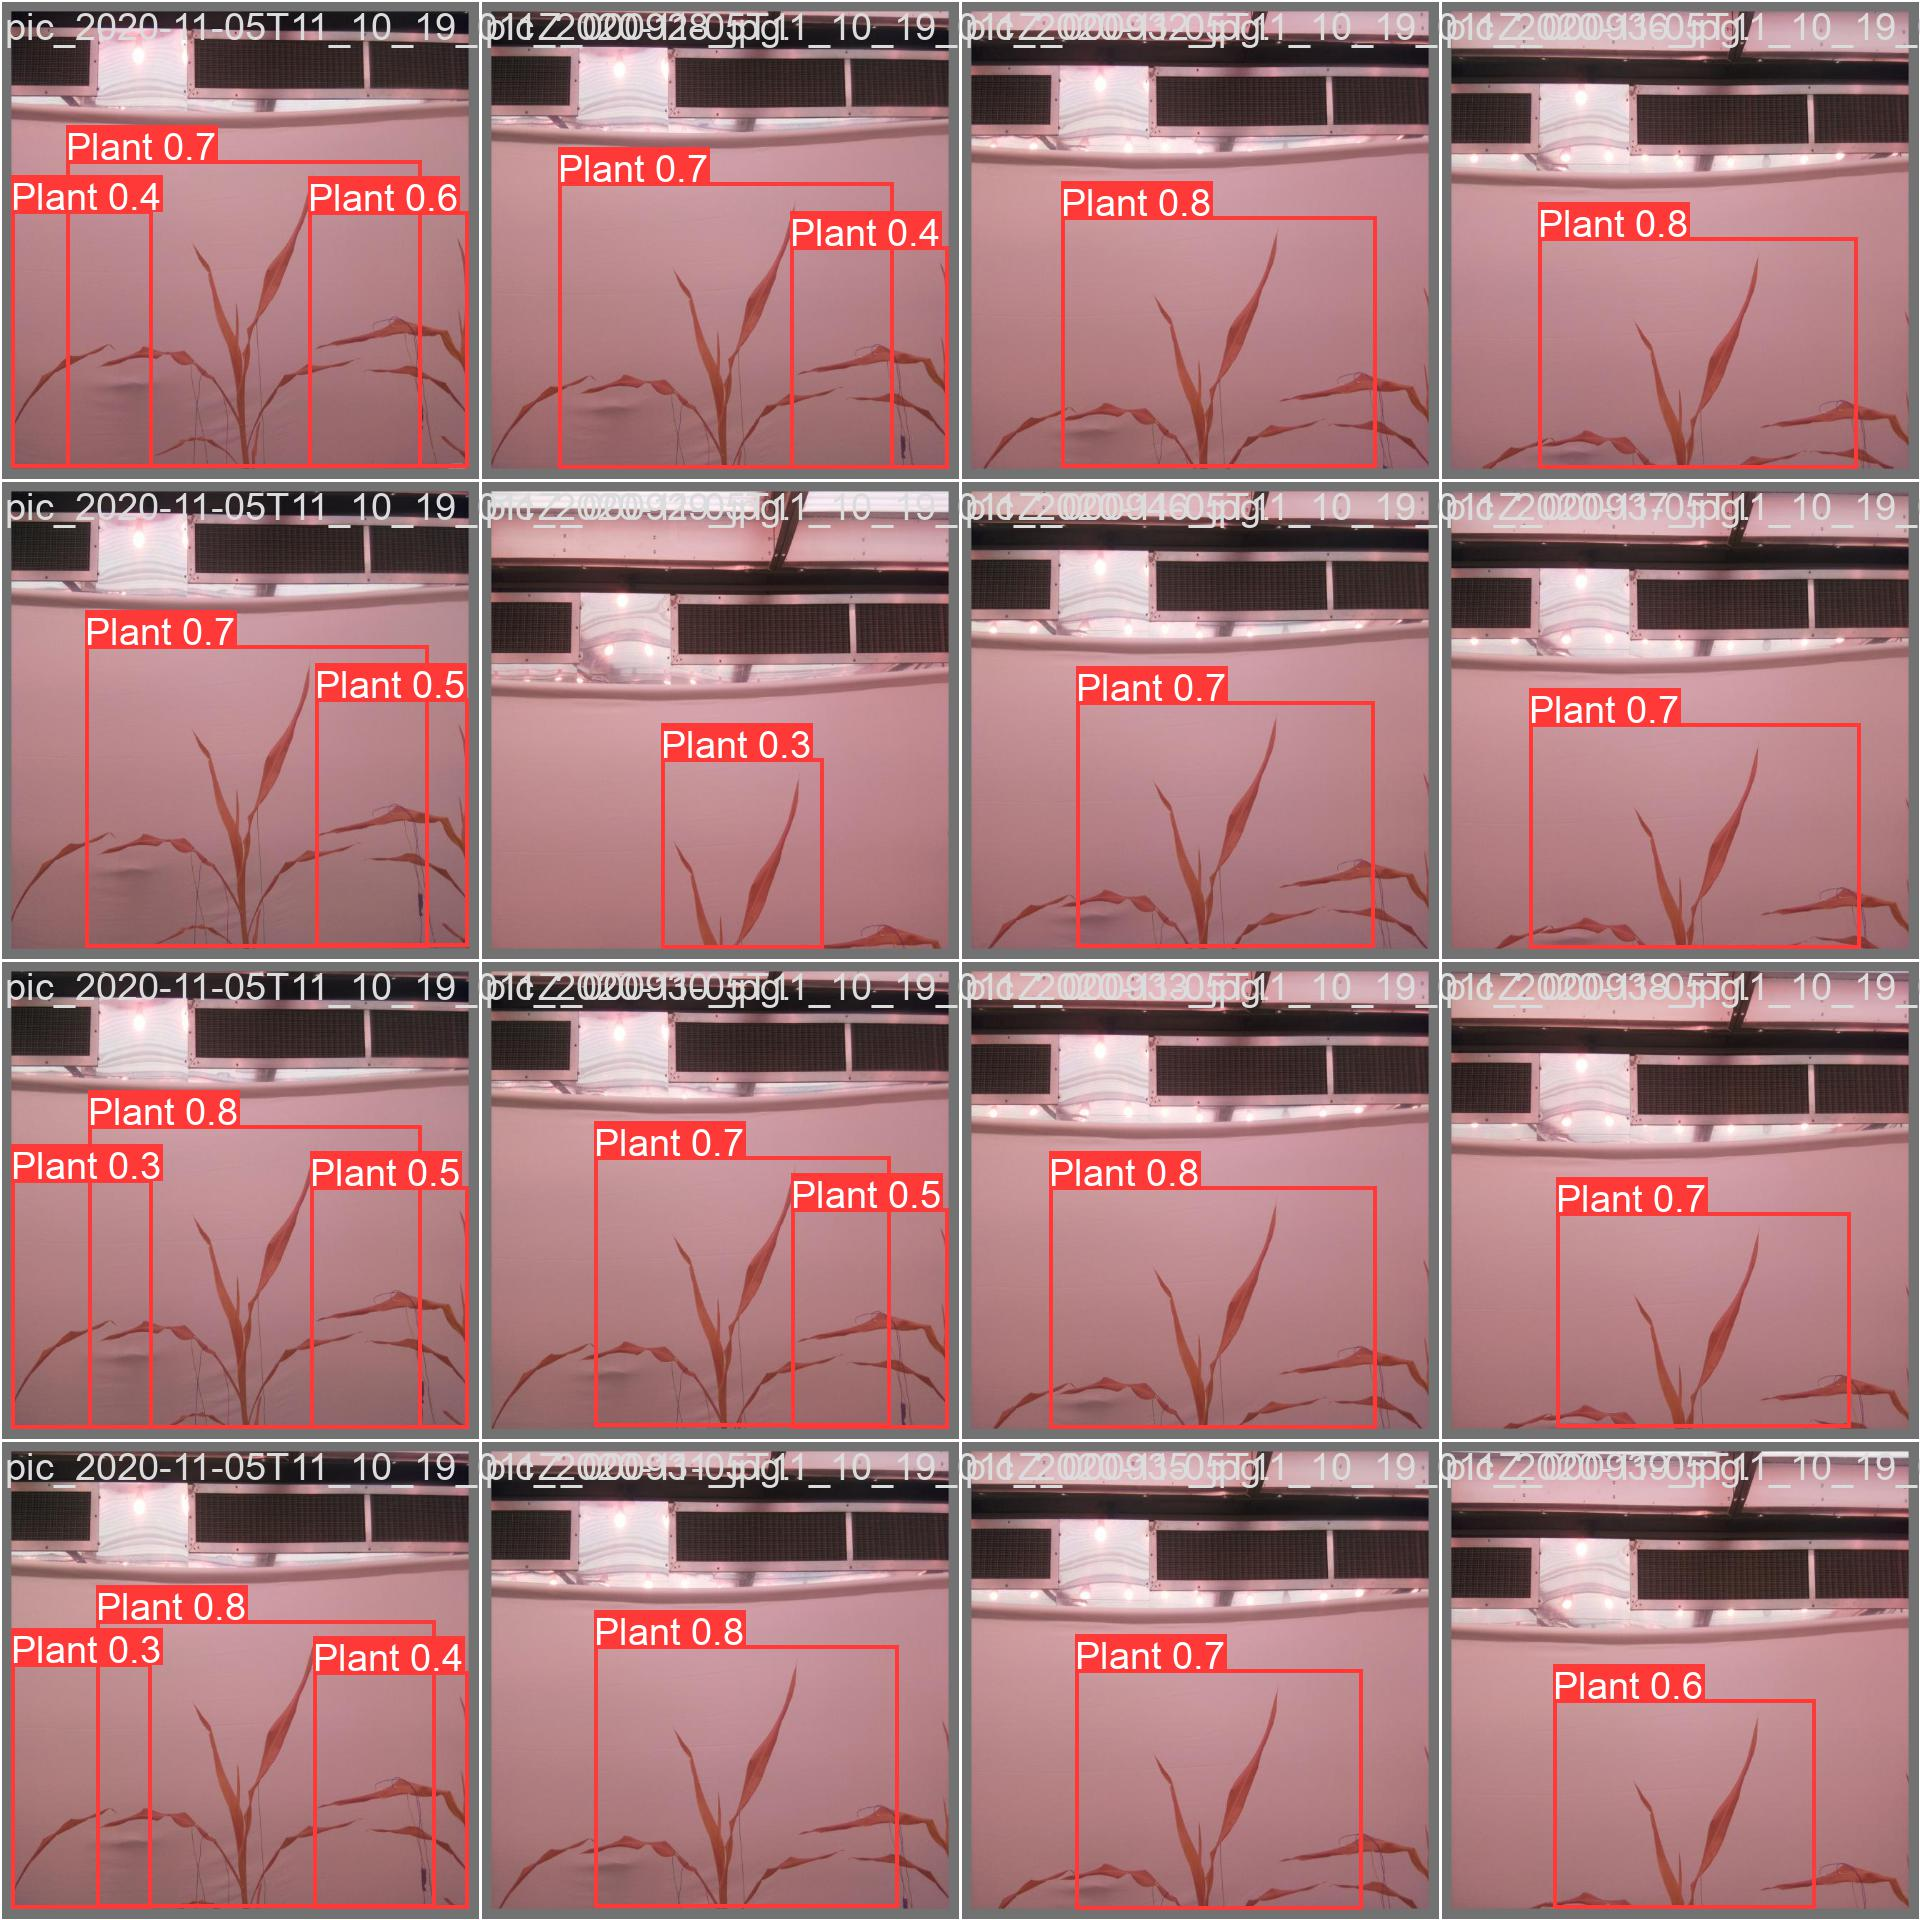

In [ ]:
Image(filename='/content/runs/detect/val/val_batch2_pred.jpg',width=600)

In [ ]:
model.predict('/content/yolov8n.pt',source='/content/Plant-finder-2/test/images/pic_2020-11-05T11_10_19_011Z_000681_jpg.rf.831fe403608502e606ab09cc672144aa.jpg',show=True)

TypeError: ignored

In [ ]:
!zip -r 'fili.zip' /content/runs

NotImplementedError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!cp -R '/content/runs' '/content/drive/yolo8runs'

NotImplementedError: ignored

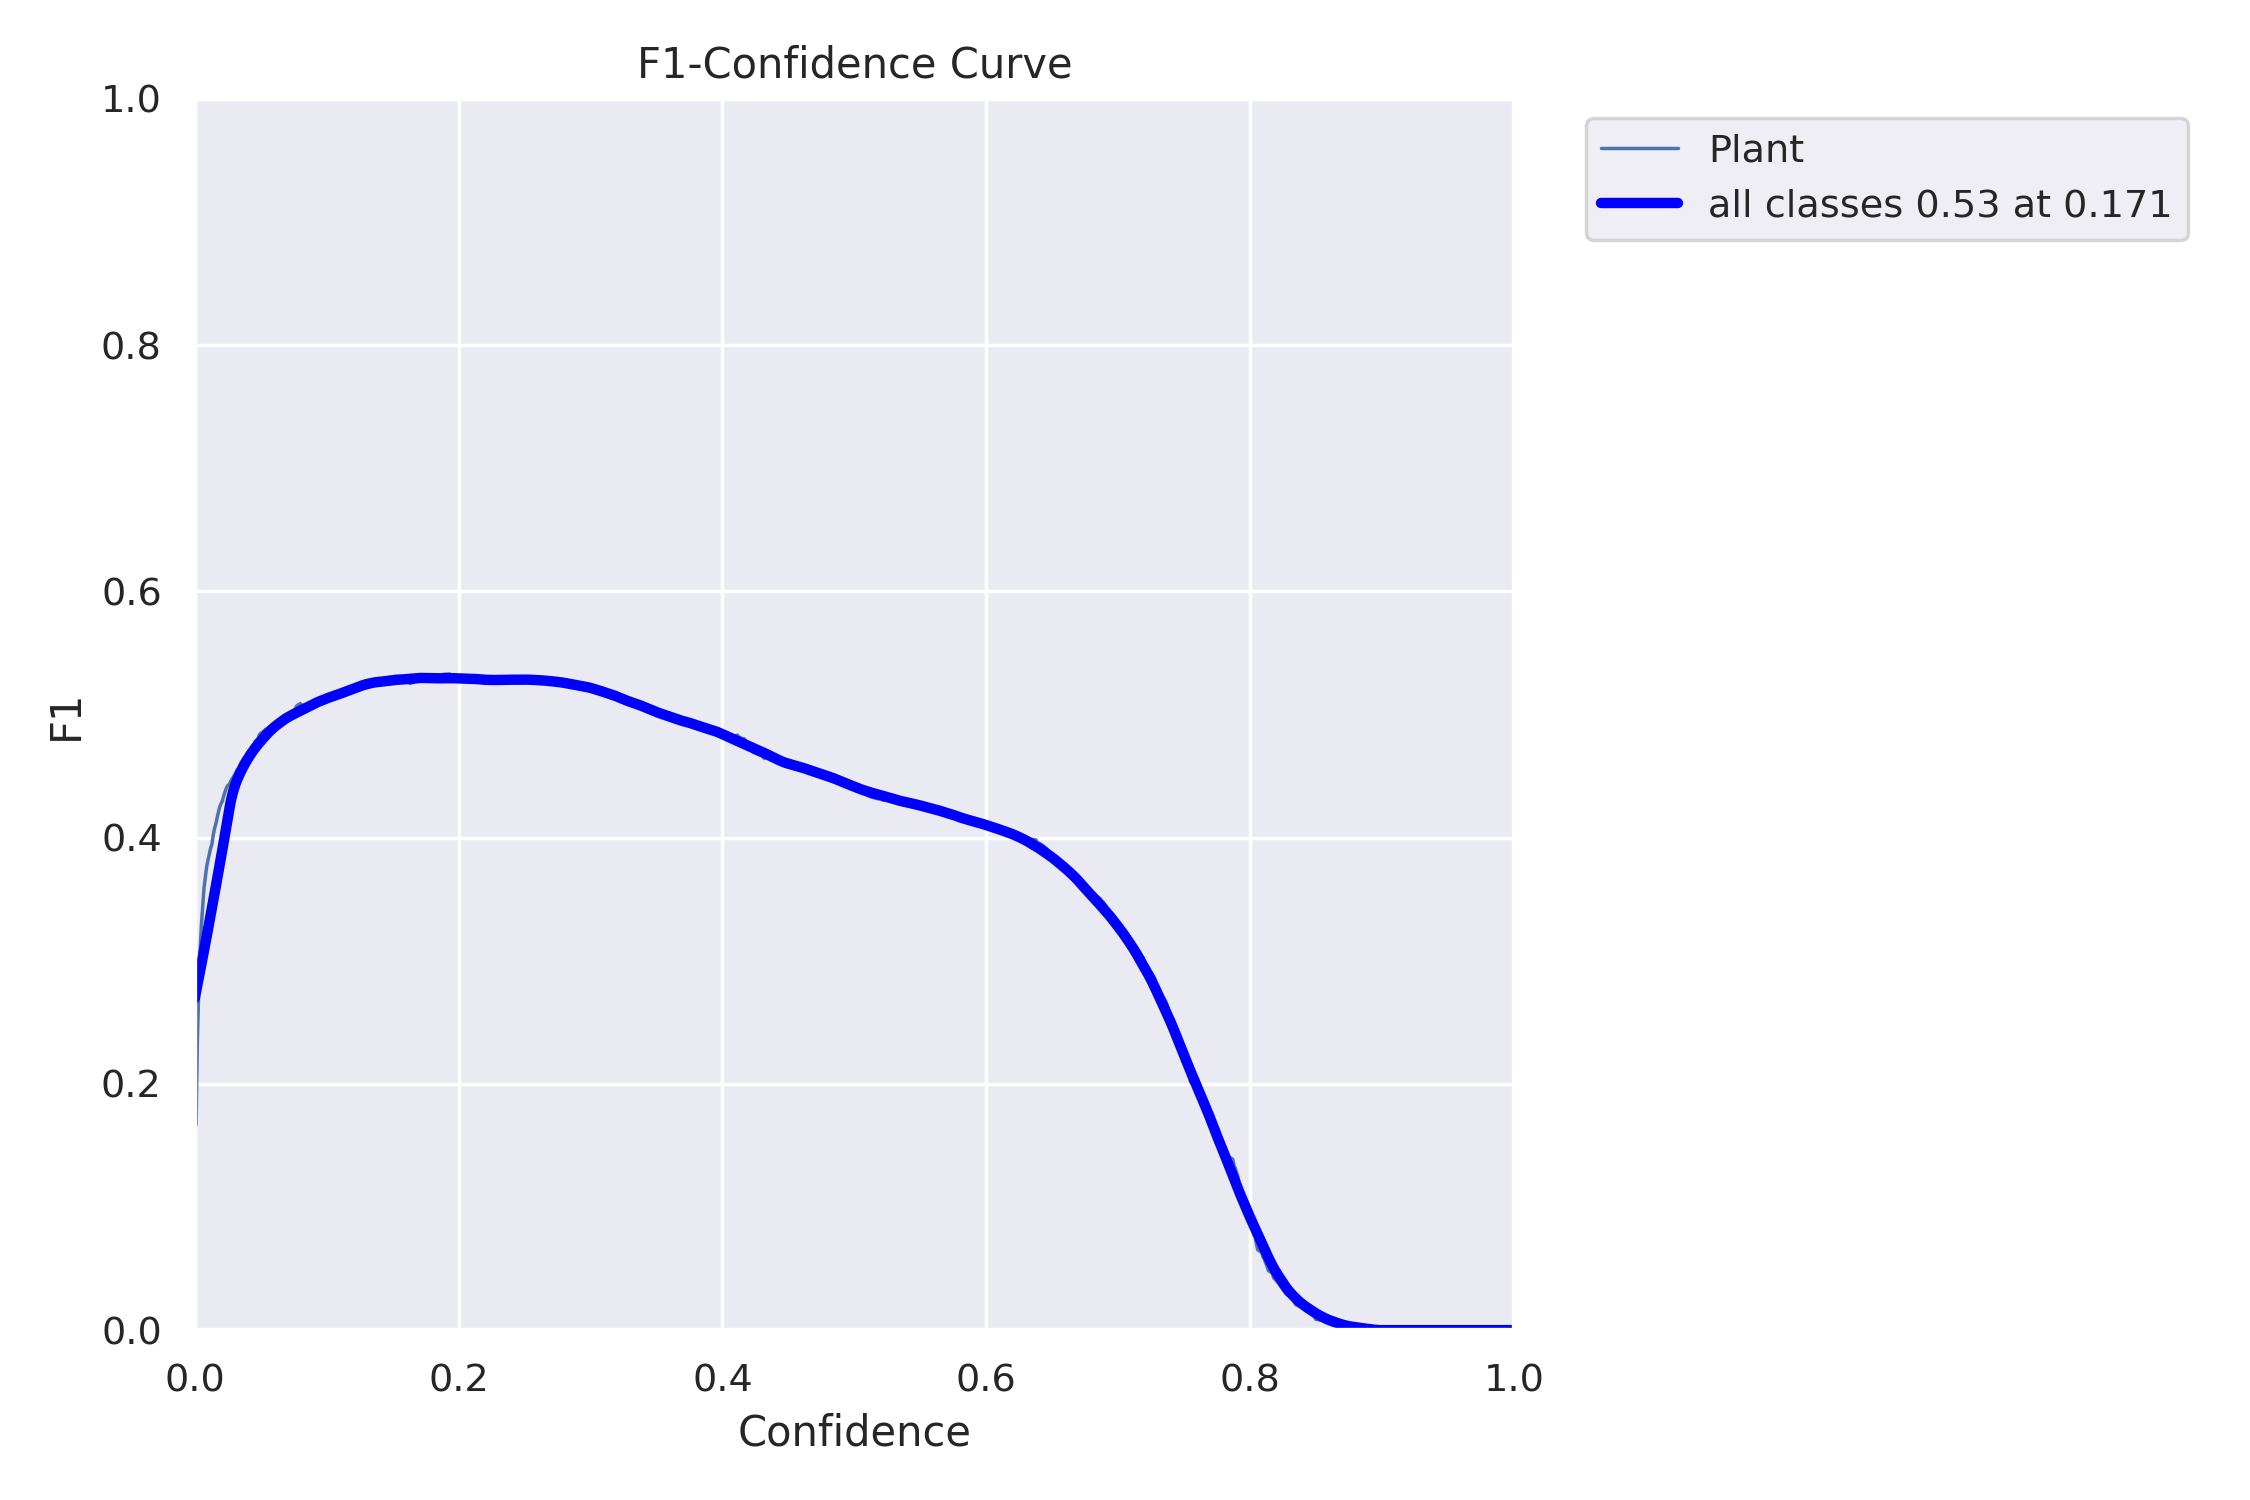

In [ ]:
Image(filename='/content/runs/detect/val/F1_curve.png',width=600)

In [8]:
model = YOLO("/content/best.pt")
model.train(data="/content/Plant-finder-2/data.yaml",epochs=100)  # train the model

Ultralytics YOLOv8.0.64 🚀 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=/content/best.pt, data=/content/Plant-finder-2/data.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, d

KeyboardInterrupt: ignored